In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os
import gmaps

from IPython.display import IFrame
from tqdm import tqdm
from glob import glob
from collections import Counter
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
from statsmodels.tsa.seasonal import seasonal_decompose

InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [10]:
os.environ["GOOGLE_API_KEYS"]

KeyError: 'GOOGLE_API_KEYS'

In [2]:
df = pd.read_csv('./data/training.csv')
df.date = pd.to_datetime(df['date'])
df = df.set_index('date')
df.columns
df.head()

Index(['PM2.5|mean', 'PM2.5|median', 'PM2.5|std', 'PM2.5|min', 'PM2.5|max',
       'temperature|mean', 'temperature|median', 'temperature|std',
       'temperature|min', 'temperature|max', 'dewpoint|mean',
       'dewpoint|median', 'dewpoint|std', 'dewpoint|min', 'dewpoint|max',
       'humidity|mean', 'humidity|median', 'humidity|std', 'humidity|min',
       'humidity|max', 'wind_speed|mean', 'wind_speed|median',
       'wind_speed|std', 'wind_speed|min', 'wind_speed|max', 'pressure|mean',
       'pressure|median', 'pressure|std', 'pressure|min', 'pressure|max',
       'precip_rate|mean', 'precip_rate|median', 'precip_rate|std',
       'precip_rate|min', 'precip_rate|max', 'precip_1hr|mean',
       'precip_1hr|median', 'precip_1hr|std', 'precip_1hr|min',
       'precip_1hr|max', 'solarradiation|mean', 'solarradiation|median',
       'solarradiation|std', 'solarradiation|min', 'solarradiation|max',
       'day_of_week', 'Year', 'Month', 'Day', 'Hour', 'day_of_year', 'quarter',
       '

PM2.5|mean  PM2.5|median  PM2.5|std  PM2.5|min  \
date                                                                  
2016-03-03 15:00:00        62.9          62.9        0.0       62.9   
2016-03-03 16:00:00        62.9          62.9        0.0       62.9   
2016-03-03 17:00:00        55.5          55.5        0.0       55.5   
2016-03-03 18:00:00        55.5          55.5        0.0       55.5   
2016-03-03 19:00:00        47.9          47.9        0.0       47.9   

                     PM2.5|max  temperature|mean  temperature|median  \
date                                                                   
2016-03-03 15:00:00       62.9         28.366667               28.30   
2016-03-03 16:00:00       62.9         28.000000               28.00   
2016-03-03 17:00:00       55.5         27.700000               27.70   
2016-03-03 18:00:00       55.5         27.433333               27.40   
2016-03-03 19:00:00       47.9         27.250000               27.25   

                     temperature|std  temperature|min  temperature|max  \
date                                                                     
2016-03-03 15:00:00         0.208167             28.2             28.6   
2016-03-03 16:00:00         0.081650             27.9             28.1   
2016-03-03 17:00:00         0.081650             27.6             27.8   
2016-03-03 18:00:00         0.057735             27.4             27.5   
2016-03-03 19:00:00         0.057735             27.2             27.3   

                         ...       solarradiation|min  solarradiation|max  \
date                     ...                                                
2016-03-03 15:00:00      ...                      0.0                 0.0   
2016-03-03 16:00:00      ...                      0.0                 0.0   
2016-03-03 17:00:00      ...                      0.0                 0.0   
2016-03-03 18:00:00      ...                      0.0                 0.0   
2016-03-03 19:00:00      ...                      0.0                 0.0   

                     day_of_week  Year  Month  Day  Hour  day_of_year  \
date                                                                    
2016-03-03 15:00:00     Thursday  2016      3    3    15           63   
2016-03-03 16:00:00     Thursday  2016      3    3    16           63   
2016-03-03 17:00:00     Thursday  2016      3    3    17           63   
2016-03-03 18:00:00     Thursday  2016      3    3    18           63   
2016-03-03 19:00:00     Thursday  2016      3    3    19           63   

                     quarter  week_of_year  
date                                        
2016-03-03 15:00:00        1             9  
2016-03-03 16:00:00        1             9  
2016-03-03 17:00:00        1             9  
2016-03-03 18:00:00        1             9  
2016-03-03 19:00:00        1             9  

[5 rows x 53 columns]

In [3]:
data = [go.Scatter(x=df.date, y=df['PM2.5|mean'])]


layout = go.Layout(title='PM2.5')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [4]:
data = []

for year in range(2016, 2020):
    fil = df[df.Year == year]
#     fil.date.dt.strftime('%m %d').astype(str)
    data.append(
        go.Scatter(x=fil.date.dt.strftime('2019-%m-%d %H').astype(str), y=fil['PM2.5|mean'], name=year)
    )
    
layout = go.Layout(
    title='PM2.5 mean'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [5]:
cats = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df['day_of_week'] = df['day_of_week'].astype('category', categories=cats, ordered=True)

/Users/nutorbit/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead



![](../image/figure2.jpg)

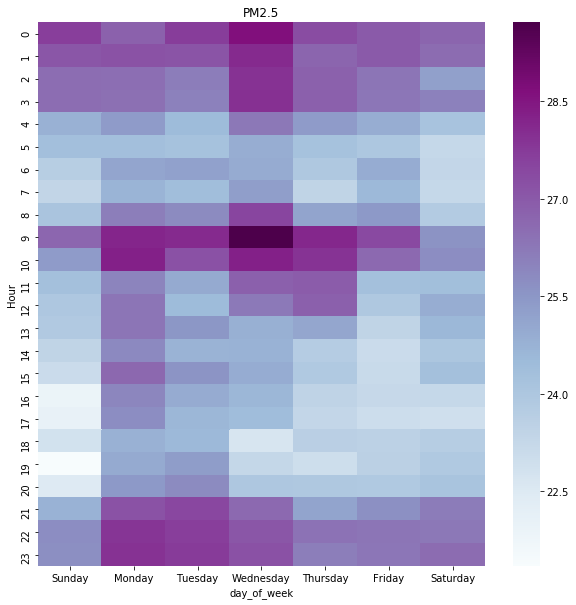

In [7]:
day_per_hour_pm25 = pd.pivot_table(df, index='Hour', columns='day_of_week', aggfunc='mean', values='PM2.5|mean')

fig = plt.figure(figsize=(10, 10))
_ = sns.heatmap(day_per_hour_pm25, cbar=True, cmap='BuPu').set_title('PM2.5')

In [19]:

location_coords = (13.7417841, 100.5259503)
gmaps.figure(center=location_coords, zoom_level=10)

Figure(layout=FigureLayout(height='420px'))

In [11]:
# day_per_hour_temperature = pd.pivot_table(df, index='Hour', columns='day_of_week', aggfunc='mean', values='temperature|mean')

# fig = plt.figure(figsize=(10, 10))
# _ = sns.heatmap(day_per_hour_temperature, cbar=False, cmap='BuPu').set_title('temperature')

In [12]:
# day_per_hour_pressure = pd.pivot_table(df, index='Hour', columns='day_of_week', aggfunc='mean', values='pressure|mean')

# fig = plt.figure(figsize=(10, 10))
# _ = sns.heatmap(day_per_hour_pressure, cbar=False, cmap='BuPu').set_title('pressure')

In [13]:
# day_per_hour_humidity = pd.pivot_table(df, index='Hour', columns='day_of_week', aggfunc='mean', values='humidity|mean')

# fig = plt.figure(figsize=(10, 10))
# _ = sns.heatmap(day_per_hour_humidity, cbar=False, cmap='BuPu').set_title('humidity')

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


result = seasonal_decompose(df['PM2.5|mean'], freq=30*24) # observe every 30 day
_ = result.plot()
plt.show()

In [9]:
# fig = plt.figure(figsize=(15, 15))
# _ = sns.heatmap(df.corr(), cbar=True, cmap='BuPu').set_title('test')

In [4]:
cols = df.columns
cols = list(filter(lambda x: 'mean' in x, cols))

# correlation doesn't imply causation

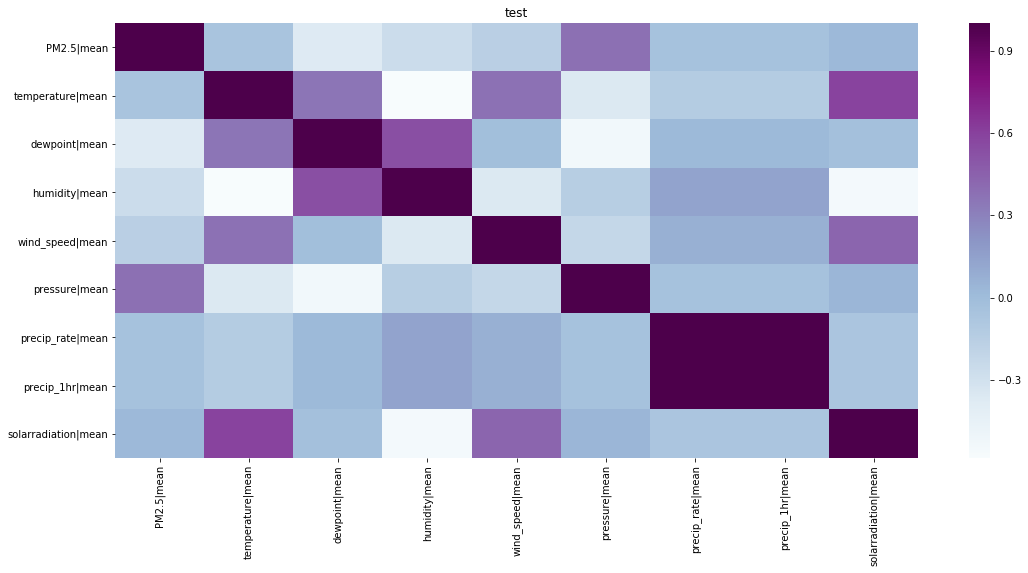

In [8]:
fig = plt.Figure(figsize=(18, 18))

_ = sns.heatmap(df[cols].corr(), cbar=True, cmap='BuPu').set_title('test')

![](./image/units.jpg)

In [22]:
bins = [0, 12, 35, 55, 150, 250, np.inf]
names = ['1', '2', '3', '4', '5', '6']

df['level'] = pd.cut(df['PM2.5|mean'], bins, labels=names).values

In [23]:
sns.pairplot(df[cols+['level']], hue='level')